# Benjamin Freund
# Project 2

## *Introduction*

"Death doesn't discriminate between the sinners and the saints, it takes and it takes and it takes" (*Wait for It* by Leslie Odom, Jr. and the cast of the Broadway musical *Hamilton*).

Sadly, people are murdered every day in the United States of America. Thousands of lives are lost for what appears to be no good reason. The trend of murder must stop, and violence must be put to a halt.

I have chosen to work with murder data in the hopes of unveiling some insight or trend from which law enforcement, political officials, or other significant individuals can glean from. An excellent way to work on lowering the murder rate is to see if there are any commonalities amongst the murders that are happening. If commonalities arise, they can be tackled at their source, decreasing their presence and, hopefully, lowering the murder rate.

My research question is simple: Is there any correlation between a city's geographic location and the number of murders they record? To this end, I will be analyzing the cities in which the most and least murders occur, the cities with the highest increases and decreases in murder count, and the cities' geographic location in relation to each other.

## *Data Summary*

The data I have chosen to work with is from a [GitHub repository](https://raw.githubusercontent.com/fivethirtyeight/data/master/murder_2016/murder_2015_final.csv), citing data from the FBI Uniform Crime Reports. This dataset looks at 83 cities throughout the United States with at least 250,000 residents. Provided in the dataset are the city ("city") and state ("state") in which the murders took place, the total number of murders in 2014 ("2014_murders"), the total number of murders in 2015 ("2015_murders"), and the difference between the two years ("change"). The city and state variables are categorical variables, while 2014_murders, 2015_murders, and change are all discrete numerical variables.

The Python code below imports the Pandas library into the Python environment and reads the dataset into a Pandas dataframe.

In [166]:
# Importing the Pandas library
import pandas as pd

# Storing the dataset in the variable filename
filename = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/murder_2016/murder_2015_final.csv'

# Reading the dataset, turning it into a dataframe, and storing it in murders
murders = pd.read_csv(filename)

# Printing murders
print(murders)

              city          state  2014_murders  2015_murders  change
0        Baltimore       Maryland           211           344     133
1          Chicago       Illinois           411           478      67
2          Houston          Texas           242           303      61
3        Cleveland           Ohio            63           120      57
4       Washington           D.C.           105           162      57
..             ...            ...           ...           ...     ...
78     San Antonio          Texas           103            94      -9
79  Corpus Christi          Texas            27            17     -10
80      Pittsburgh   Pennsylvania            69            57     -12
81          Boston  Massachusetts            53            38     -15
82         Buffalo       New York            60            41     -19

[83 rows x 5 columns]


## *Exploratory Data Analysis (EDA)*

The first step in properly analyzing any statistical dataset is to perform some EDA. In order to create the necessary visualizations, I must first import the Pyplot function from the Matplotlib library. In order for the Matplotlib library to properly import, the text below needs to proceed the importing in a Markdown cell. While I'm importing libraries, I will also import the NumPy library and the Seaborn library.

%matplotlib notebook

In [5]:
# Importing the Pyplot function from the Matplotlib library
import matplotlib.pyplot as plt

# Importing the Seaborn library
import seaborn as sns

# Importing the NumPy library
import numpy as np

The first step I will take in my EDA is retrieving summary statistics about the murder count in 2014, 2015, and the change. This will give me the number of observations, mean, standard deviation, minimum, first quartile, median, third quartile, and maximum values for each variable.

In [167]:
# Getting descriptive statistics about the murders dataframe
murders.describe()

,2014_murders,2015_murders,change
count,83.000000,83.000000,83.000000
mean,65.746988,75.481928,9.734940
std,79.011244,91.684289,21.858795
min,0.000000,1.000000,-19.000000
25%,19.500000,22.500000,-3.000000
50%,32.000000,39.000000,4.000000
75%,82.000000,94.000000,14.000000
max,411.000000,478.000000,133.000000


It's already significant to note that every statistic (with the exception of count) is higher in 2015 than in 2014. Furthermore, the mean number of murders and the standard deviation of murders both rise significantly. All of this indicates that the overall murder count is increasing. However, as noted by the minimum and first quartile of the change variable, there are some cities which actually had a decrease in murders from 2014 to 2015. It would be a good idea to identify why certain cities have had a decrease in murders despite the national trend appearing to be the opposite.

Next, I'll take a look at some visual representations of the data to see what I can glean from them. Below are two boxplots. The former shows the distribution of murders in 2014, while the latter shows the distribution of murders in 2015.

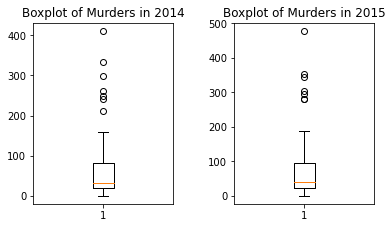

In [165]:
# Defining a figure for plotting
plt.figure(1)

# Specifying the left subplot
plt.subplot(121)

# Specifying the plot and the data to be plotted
plt.boxplot(murders['2014_murders'])

# Specifying the title of the boxplot
plt.title('Boxplot of Murders in 2014')

# Leaving the x-axis label blank (Matplotlib.pyplot will automatically put a 1)
plt.xlabel(' ')

# Specifying the right subplot
plt.subplot(122)

# Specifying the plot and the data to be plotted
plt.boxplot(murders['2015_murders'])

# Specifying the title of the boxplot
plt.title('Boxplot of Murders in 2015')

# Leaving the x-axis label blank (Matplotlib.pyplot will automatically put a 1)
plt.xlabel(' ')

# Specifying the spacing between subplots
plt.tight_layout(pad = 3.0)

# Showing the boxplots in the figure
plt.show()

I can also get the same visualizations using the Seaborn library, as shown below.

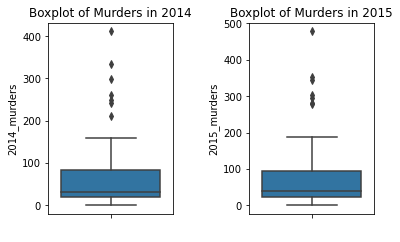

In [164]:
# Defining a figure for plotting
plt.figure(1)

# Specifying the left subplot
plt.subplot(121)

# Specifying the plot, the data to be plotted, and the orientation of the plot
sns.boxplot(murders['2014_murders'], orient = 'v')

# Specifying the title of the boxplot
plt.title('Boxplot of Murders in 2014')

# Leaving the x-axis label blank
plt.xlabel(' ')

# Specifying the right subplot
plt.subplot(122)

# Specifying the plot, the data to be plotted, and the orientation of the plot
sns.boxplot(murders['2015_murders'], orient = 'v')

# Specifying the title of the boxplot
plt.title('Boxplot of Murders in 2015')

# Leaving the x-axis label blank
plt.xlabel(' ')

# Specifying the spacing between subplots
plt.tight_layout(pad = 3.0)

# Showing the boxplots in the figure
plt.show()

Boxplots detail the minimum, first quartile, median, third quartile, and maximum values, as well as any outliers in the dataset (indicated by the circles on the boxplots). As can be seen from the boxplots, both years have outliers that are over the maximum in the dataset. Additionally, both medians (red lines) are closer to the first quartile (the bottom of the box) than the third quartile (the top of the box), and the whiskers on the bottom are shorter than the whiskers on the top, displaying that both distributions are positively skewed (skewed right). All of these notes emphasize how a majority of the observations fall on the higher end, above the mean.

EDA can also be done with the categorical variables. I'll use the unique function found within the Pandas library to determine how many states this dataset takes into account.

In [27]:
# Calculating the number of unique states and printing it in sentence form
print('There are', len(pd.unique(murders['state'])), 'unique states in the murders dataset.')

There are 34 unique states in the murders dataset.


As can be seen from the code above, cities in 34 out of the 50 states are analyzed in this dataset. While this is a majority of the states, and while the dataset only looks at cities with at least 250,000 residents (thus ensuring the dataset focuses on the most populated areas), it is important to note that every state is not being analyzed.

The frequency count of the states can also be calculated. The bar graph below displays how many times each state is mentioned in the dataset.

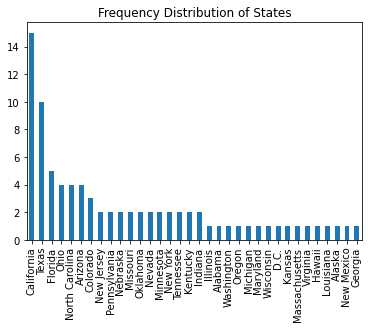

In [115]:
# Creating the frequency distribution of states and storing it in state_plot
state_plot = murders['state'].value_counts().plot.bar(title = 'Frequency Distribution of States')

# Displaying state_plot
state_plot

I can also get to the same visualization using the Seaborn library, as shown below.

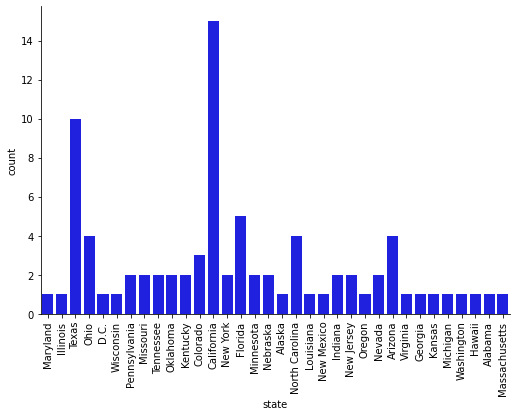

In [117]:
# Creating the frequency distribution of states and storing it in state_plot_2
state_plot_2 = sns.catplot('state', data = murders, aspect = 1.5, kind = 'count', color = 'b')

# Rotating the x axis of state_plot_2 and printing it
state_plot_2.set_xticklabels(rotation=90)

As can be seen from the above bar plots, states like California and Texas have 10 or more cities in this dataset, while states like New Mexico and Georgia only have one city each. Again, the most populous cities in the United States were chosen, so it is understandable why certain states would have more cities in the dataset than others. Nonetheless, it is important to take note of which states are being represented and to what degree that representation is occurring.

## *Inference*

Now I'll tackle the research question. As a reminder, the research question is: Is there any correlation between a city's geographic location and the number of murders they record? A couple of steps must be taken before I can properly tackle this analysis.

According to the [United States Embassy and Consulate in the Republic of Korea](https://kr.usembassy.gov/education-culture/infopedia-usa/travel-usa/regions-united-states/#1), the states can be divided into six geographical regions: New England, the Mid-Atlantic, the South, the Midwest, the Southwest, and the West. These are the state groupings that I will be using for my analysis.

The first step is to add an additional column to the dataframe which displays which group the state belongs to. For the purposes of this analysis, New England will be group 1, the Mid-Atlantic will be group 2, the South will be group 3, the Midwest will be group 4, the Southwest will be group 5, and the West will be group 6.

In [60]:
# Adding the group column to the murders dataframe and assigning the appropriate value, depending on the state
murders.loc[(murders['state'] == 'Connecticut') | (murders['state'] == 'Maine') | (murders['state'] == 'Massachusetts') | (murders['state'] == 'New Hampshire') | (murders['state'] == 'Rhode Island') | (murders['state'] == 'Vermont'), 'group'] = 1
murders.loc[(murders['state'] == 'Delaware') | (murders['state'] == 'Maryland') | (murders['state'] == 'New Jersey') | (murders['state'] == 'New York') | (murders['state'] == 'Pennsylvania') | (murders['state'] == 'D.C.'), 'group'] = 2
murders.loc[(murders['state'] == 'Alabama') | (murders['state'] == 'Arkansas') | (murders['state'] == 'Florida') | (murders['state'] == 'Georgia') | (murders['state'] == 'Kentucky') | (murders['state'] == 'Louisiana') | (murders['state'] == 'Mississippi') | (murders['state'] == 'North Carolina') | (murders['state'] == 'South Carolina') | (murders['state'] == 'Tennessee') | (murders['state'] == 'Virginia') | (murders['state'] == 'West Virginia'), 'group'] = 3
murders.loc[(murders['state'] == 'Illinois') | (murders['state'] == 'Indiana') | (murders['state'] == 'Iowa') | (murders['state'] == 'Kansas') | (murders['state'] == 'Michigan') | (murders['state'] == 'Minnesota') | (murders['state'] == 'Missouri') | (murders['state'] == 'Nebraska') | (murders['state'] == 'North Dakota') | (murders['state'] == 'Ohio') | (murders['state'] == 'South Dakota') | (murders['state'] == 'Wisconsin'), 'group'] = 4
murders.loc[(murders['state'] == 'Arizona') | (murders['state'] == 'New Mexico') | (murders['state'] == 'Oklahoma') | (murders['state'] == 'Texas'), 'group'] = 5
murders.loc[(murders['state'] == 'Alaska') | (murders['state'] == 'Colorado') | (murders['state'] == 'California') | (murders['state'] == 'Hawaii') | (murders['state'] == 'Idaho') | (murders['state'] == 'Montana') | (murders['state'] == 'Nevada') | (murders['state'] == 'Oregon') | (murders['state'] == 'Utah') | (murders['state'] == 'Washington') | (murders['state'] == 'Wyoming'), 'group'] = 6

# Displaying murders
murders

,city,state,2014_murders,2015_murders,change,group
0,Baltimore,Maryland,211,344,133,2
1,Chicago,Illinois,411,478,67,4
2,Houston,Texas,242,303,61,5
3,Cleveland,Ohio,63,120,57,4
4,Washington,D.C.,105,162,57,2
...,...,...,...,...,...,...
78,San Antonio,Texas,103,94,-9,5
79,Corpus Christi,Texas,27,17,-10,5
80,Pittsburgh,Pennsylvania,69,57,-12,2
81,Boston,Massachusetts,53,38,-15,1


Because the frequency of states isn't evenly distributed amongst the dataset (as shown by the Frequency Distribution of States bar graph above), the frequency of groups will also most likely not be evenly distributed. The bar graph below looks at the frequency distribution of the groups.

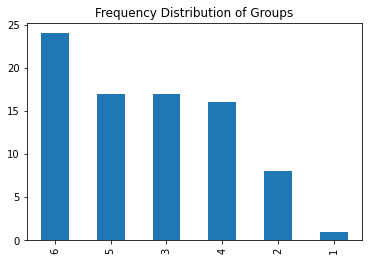

In [119]:
# Creating the frequency distribution of groups and storing it in group_plot
group_plot = murders['group'].value_counts().plot.bar(title = 'Frequency Distribution of Groups')

# Displaying group_plot
group_plot

I can also get the same visualization using the Seaborn library, as shown below.

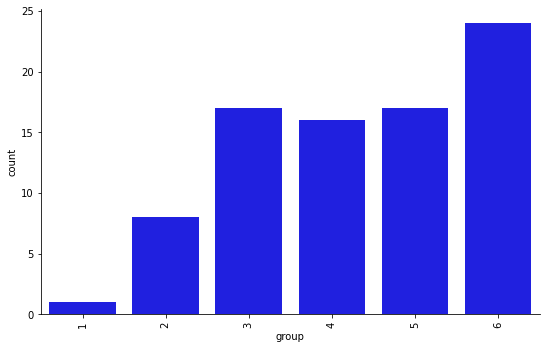

In [120]:
# Creating the frequency distribution of groups and storing it in group_plot_2
group_plot_2 = sns.catplot('group', data = murders, aspect = 1.5, kind = 'count', color = 'b')

# Rotating the x axis labels of group_plot_2 and displaying it
group_plot_2.set_xticklabels(rotation=90)

As can be seen above, the West has the most representation with almost 25 cities, while New England has the least representation with around 1 city. These representations are important to keep in mind while analyzing the data.

Now that the state groupings have been inserted and looked into, murders by geographical location can be more properly analyzed. Below, I add up the sum for each year and for the change per group, and I add it on to the end of the dataframe.

In [156]:
# Adding the sum of 2014_murders per group to the end of the respective entries in the dataframe
murders.loc[murders['group'] == 1, '2014_sum'] = (murders.query('group == 1')['2014_murders'].sum())
murders.loc[murders['group'] == 2, '2014_sum'] = (murders.query('group == 2')['2014_murders'].sum())
murders.loc[murders['group'] == 3, '2014_sum'] = (murders.query('group == 3')['2014_murders'].sum())
murders.loc[murders['group'] == 4, '2014_sum'] = (murders.query('group == 4')['2014_murders'].sum())
murders.loc[murders['group'] == 5, '2014_sum'] = (murders.query('group == 5')['2014_murders'].sum())
murders.loc[murders['group'] == 6, '2014_sum'] = (murders.query('group == 6')['2014_murders'].sum())

# Adding the sum of 2015_murders per group to the end of the respective entries in the dataframe
murders.loc[murders['group'] == 1, '2015_sum'] = (murders.query('group == 1')['2015_murders'].sum())
murders.loc[murders['group'] == 2, '2015_sum'] = (murders.query('group == 2')['2015_murders'].sum())
murders.loc[murders['group'] == 3, '2015_sum'] = (murders.query('group == 3')['2015_murders'].sum())
murders.loc[murders['group'] == 4, '2015_sum'] = (murders.query('group == 4')['2015_murders'].sum())
murders.loc[murders['group'] == 5, '2015_sum'] = (murders.query('group == 5')['2015_murders'].sum())
murders.loc[murders['group'] == 6, '2015_sum'] = (murders.query('group == 6')['2015_murders'].sum())

# Adding the sum of change per group to the end of the respective entries in the dataframe
murders.loc[murders['group'] == 1, 'change_sum'] = (murders.query('group == 1')['change'].sum())
murders.loc[murders['group'] == 2, 'change_sum'] = (murders.query('group == 2')['change'].sum())
murders.loc[murders['group'] == 3, 'change_sum'] = (murders.query('group == 3')['change'].sum())
murders.loc[murders['group'] == 4, 'change_sum'] = (murders.query('group == 4')['change'].sum())
murders.loc[murders['group'] == 5, 'change_sum'] = (murders.query('group == 5')['change'].sum())
murders.loc[murders['group'] == 6, 'change_sum'] = (murders.query('group == 6')['change'].sum())

# Displaying murders
murders

,city,state,2014_murders,2015_murders,change,group,2014_sum,2015_sum,change_sum
0,Baltimore,Maryland,211,344,133,2,1143.0,1367.0,224.0
1,Chicago,Illinois,411,478,67,4,1521.0,1814.0,293.0
2,Houston,Texas,242,303,61,5,910.0,997.0,87.0
3,Cleveland,Ohio,63,120,57,4,1521.0,1814.0,293.0
4,Washington,D.C.,105,162,57,2,1143.0,1367.0,224.0
...,...,...,...,...,...,...,...,...,...
78,San Antonio,Texas,103,94,-9,5,910.0,997.0,87.0
79,Corpus Christi,Texas,27,17,-10,5,910.0,997.0,87.0
80,Pittsburgh,Pennsylvania,69,57,-12,2,1143.0,1367.0,224.0
81,Boston,Massachusetts,53,38,-15,1,53.0,38.0,-15.0


With these sums now in the dataframe, I can plot the total number of murders by state group per year and compare them to each other. Those plots are shown below.

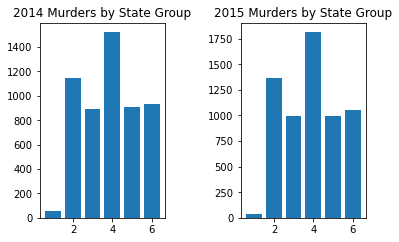

In [162]:
# Defining a figure for plotting
plt.figure(1)

# Specifying the left subplot
plt.subplot(121)

# Specifying the plot and the axes
plt.bar(murders['group'], murders['2014_sum'])

# Specifying the title
plt.title('2014 Murders by State Group')

# Specifying the right subplot
plt.subplot(122)

# Specifying the plot and the axes
plt.bar(murders['group'], murders['2015_sum'])

# Specifying the title
plt.title('2015 Murders by State Group')

# Specifying the spacing between subplots
plt.tight_layout(pad = 3.0)

# Showing the plots in the figure
plt.show()

The same plots can also be made using the Seaborn library, as shown below.

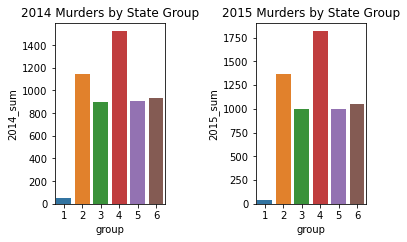

In [163]:
# Defining a figure for plotting
plt.figure(1)

# Specifying the left subplot
plt.subplot(121)

# Specifying the plot, the axes, the data to be plotted, and the orientation of the plot
sns.barplot(x = 'group', y = '2014_sum', data = murders, orient = 'v')

# Specifying the title of the bar graph
plt.title('2014 Murders by State Group')

# Specifying the right subplot
plt.subplot(122)

# Specifying the plot, the axes, the data to be plotted, and the orientation of the plot
sns.barplot(x = 'group', y = '2015_sum', data = murders, orient = 'v')

# Specifying the title of the bar graph
plt.title('2015 Murders by State Group')

# Specifying the spacing between subplots
plt.tight_layout(pad = 3.0)

# Showing the bar graphs in the figure
plt.show()

As can be seen from the bar graphs above, the Midwest clearly has the most murders per year, despite having the third fewest cities in the dataset (based on the Frequency Distribution of Groups bar graph above). Of course, this does not indicate causation (or even definitive correlation). Rather, it is simply an observation made based on the data presented.

The dataset also provides a change variable, representing the change in the number of murders from 2014 to 2015. This variable can lend some insight as to whether murder counts are increasing or decreasing in a given geographical location. Below is a bar graph representing the change in number of murders by state group per year.

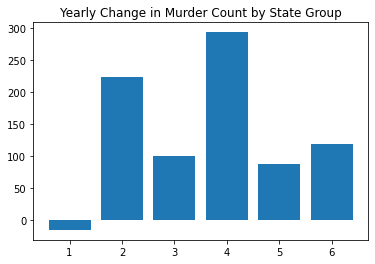

In [159]:
# Defining a figure for plotting
plt.figure(1)

# Specifying the plot and the axes
plt.bar(murders['group'], murders['change_sum'])

# Specifying the title
plt.title('Yearly Change in Murder Count by State Group')

# Showing the plot
plt.show()

The same plot can also be made using the Seaborn library, as shown below.

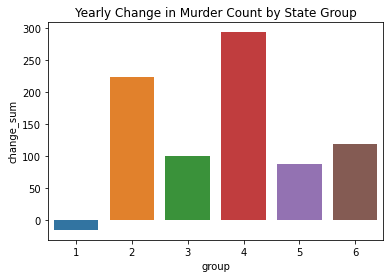

In [160]:
# Defining a figure for plotting
plt.figure(1)

# Specifying the plot, the axes, the data to be plotted, and the orientation of the plot
sns.barplot(x = 'group', y = 'change_sum', data = murders, orient = 'v')

# Specifying the title of the bar graph
plt.title('Yearly Change in Murder Count by State Group')

# Showing the bar graphs in the figure
plt.show()

As can be seen from the bar graphs above, the Midwest had the highest increase in murder count from 2014 to 2015, while New England had the largest (and only) decrease in murder count for the same time period.

In all of my analyses thus far, the Midwest region seems to have the highest murder counts, and those counts only seem to be growing. Consequently, a closer look should be taken at this region. Below are the cities in the dataset that fall under group 4.

In [161]:
# Indexing the cities who fall under group 4
murders[murders.group == 4]

,city,state,2014_murders,2015_murders,change,group,2014_sum,2015_sum,change_sum
1,Chicago,Illinois,411,478,67,4,1521.0,1814.0,293.0
3,Cleveland,Ohio,63,120,57,4,1521.0,1814.0,293.0
5,Milwaukee,Wisconsin,90,145,55,4,1521.0,1814.0,293.0
7,Kansas City,Missouri,78,109,31,4,1521.0,1814.0,293.0
9,St. Louis,Missouri,159,188,29,4,1521.0,1814.0,293.0
17,Minneapolis,Minnesota,31,47,16,4,1521.0,1814.0,293.0
18,Omaha,Nebraska,32,48,16,4,1521.0,1814.0,293.0
25,Fort Wayne,Indiana,12,25,13,4,1521.0,1814.0,293.0
28,Indianapolis,Indiana,136,148,12,4,1521.0,1814.0,293.0
33,Cincinnati,Ohio,60,66,6,4,1521.0,1814.0,293.0


From the indexed dataset above, it can be seen that Illinois, Indiana, Kansas, Michigan, Missouri, Minnesota, Nebraska, Ohio, and Wisconsin are the states represented from group 4, while Iowa, North Dakota, and South Dakota are not represented. It should also be pointed out that group 4 is one of the larger geographic regions, spanning 12 states. This could explain why the states are so diverse, yet they account for the third lowest representation in the dataset.

From this analysis, based on the count of murders per state group, the change in murder count per state group, and the geographic location of each state group, it can be said that the Midwest region seems to be the most prone to murders.

## *Conclusion*

The analysis presented sought to answer the research question: Is there any correlation between a city's geographic location and the number of murders they record? To answer this question, I found a dataset that contained murder counts for 83 of the United States' most populous cities for 2014 and 2015 and analyzed it using the Pandas, Matplotlib, and Seaborn libraries in the Python environment.

First, some EDA was done to get a better understanding of the data. Descriptive statistics such as mean, standard deviation, and quartiles were obtained, as well as box plots of the murder counts. It was clear to see that certain cities were outliers, having higher murder counts than other cities. Additionally, a frequency distribution was made of the 34 states in the dataset, showing the heavy representation of California and Texas and the lighter representation of some of the smaller states.

Next, I did further analyses specific to the research question. I used geographical groupings found on a United States Embassy's website to divide the country into six state groups, which I then attached to the dataframe. A frequency distribution of the groups showed that the West had the most representation, while New England had the least. Bar graphs were then made to display the 2014 and 2015 murder counts, respectively, by state group. It was clear to see that the Midwest had the highest murder count, despite having the third smallest representation.

To further confirm that there was an issue in the Midwest region, a bar graph was made to show the yearly change in murder count by state group. This graph, much like the graphs before it, showed that the Midwest had the highest increase in murder count, while New England had the highest decrease in murder count. I then showed how most, but not all, of the states in that group were represented in the dataset, and why the size of that group should not downplay the significance of its high murder counts.

To answer the research question, cities in certain geographic regions do seem to record more murders than cities in other regions. Based on the analyses above, the Midwest region seems to be the worst off, recording the most murders with the third smallest representation. Of course, this does not imply causation (or even definitive correlation). Nonetheless, this analysis could further encourage law enforcement, policy makers, and politicians to investigate the Midwest region and to determine why the murder counts are so high. If the reason for the heightened murder counts is discovered, steps can be taken to lower the murder count, and these changes can be emulated across other regions as well.

It is important to note the limitations of this analysis. This analysis was only done using the murder counts from 2014 and 2015. Steps may have been taken since 2015 to decrease the murder count in the United States, so these numbers may not be as applicable now as they were then. Further research should be done into current murder counts. Additionally, only cities with at least 250,000 residents were included in this dataset. A broader study would incorporate all cities in the United States. Finally, no causation or definitive correlation was established in this analysis. Rather, this analysis was intended to encourage those who can affect change to dive deeper into the murder counts in their region. A more in-depth analysis would be neccessary to establish causation in regards to murder counts.

Unfortunately, murder is stll rampant throughout the United States. However, by focusing on problem areas and trying to lower the murder counts there, my hope is that we can decrease the murder count throughout the country, and that we can live in a more peaceful society.